# ***Importing Libraries and DATA***

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as ply
import seaborn as sns
import plotly.express as px

In [ ]:
#dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud.csv")

copy=df.copy()

df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


# ***Exploratory Data Analysis***

In [ ]:
df.shape

(138116, 11)

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,138116.000000,1.381160e+05,1.381160e+05,1.381160e+05,1.381150e+05,1.381150e+05,138115.000000,138115.0
mean,9.126553,1.784274e+05,8.957970e+05,9.121265e+05,9.069548e+05,1.183330e+06,0.000883,0.0
std,1.868878,3.417495e+05,2.824668e+06,2.861606e+06,2.386388e+06,2.726211e+06,0.029708,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.088971e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,6.007116e+04,2.003750e+04,0.000000e+00,3.084900e+04,8.544306e+04,0.000000,0.0
75%,10.000000,2.210857e+05,1.963066e+05,2.247515e+05,6.666913e+05,1.114277e+06,0.000000,0.0
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138116 entries, 0 to 138115
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            138116 non-null  int64  
 1   type            138116 non-null  object 
 2   amount          138116 non-null  float64
 3   nameOrig        138116 non-null  object 
 4   oldbalanceOrg   138116 non-null  float64
 5   newbalanceOrig  138116 non-null  float64
 6   nameDest        138116 non-null  object 
 7   oldbalanceDest  138115 non-null  float64
 8   newbalanceDest  138115 non-null  float64
 9   isFraud         138115 non-null  float64
 10  isFlaggedFraud  138115 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.6+ MB


**Value Counting for Analysing**

In [ ]:
df.isFraud.value_counts()

0.0    137993
1.0       122
Name: isFraud, dtype: int64

In [ ]:
df.nameDest.value_counts()

C985934102     80
C1286084959    77
C248609774     73
C1590550415    72
C2083562754    69
               ..
M665982570      1
M152792944      1
M637867328      1
M761127993      1
C1748           1
Name: nameDest, Length: 68439, dtype: int64

In [ ]:
df.nameOrig.value_counts()

C1709295811    2
C1231006815    1
C964811063     1
C1144414057    1
C1874807440    1
              ..
C1254684761    1
C558935259     1
C2009402586    1
C503014602     1
C790956975     1
Name: nameOrig, Length: 138115, dtype: int64

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.dropna()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
138110,11,TRANSFER,436567.82,C353913447,12007.00,0.00,C947982595,58887.10,495454.93,0.0,0.0
138111,11,TRANSFER,1023642.86,C1959247934,144636.00,0.00,C1219349215,5430.52,0.00,0.0,0.0
138112,11,CASH_OUT,110828.64,C2063932957,372369.43,261540.78,C1582808814,462640.85,832488.91,0.0,0.0
138113,11,CASH_OUT,168177.59,C850779719,261540.78,93363.19,C209813603,201463.66,550170.95,0.0,0.0


**GRAPHICAL REPRESENTATION**

<ipython-input-152-7e1724685027>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



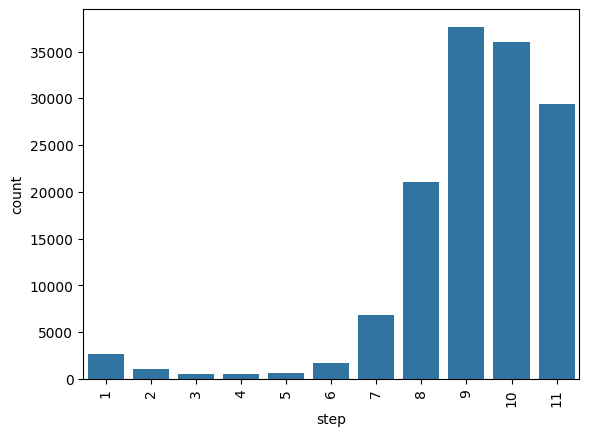

<ipython-input-152-7e1724685027>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



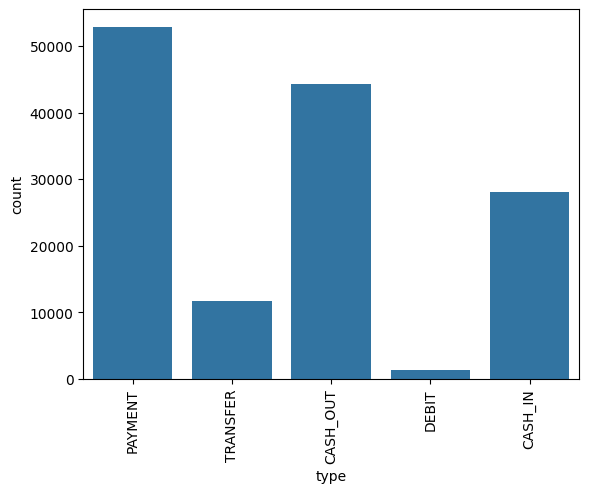

<ipython-input-152-7e1724685027>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



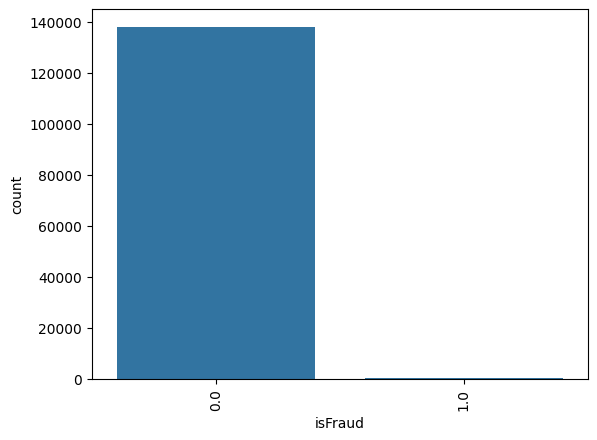

In [ ]:
def count_plot(feature):
    fig=sns.countplot(x=feature, data=df)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    ply.show()
    print("\n")

columns = ['step', 'type','isFraud']
for i in columns:
    count_plot(i)

# ***Data Cleaning***

In [ ]:
df1=df.copy()

In [ ]:
df1['changebalanceOrig']=df1['oldbalanceOrg']-df1['newbalanceOrig']
df1['changebalanceDest']=df1['oldbalanceDest']-df1['newbalanceDest']

In [ ]:
#Dropping unnecessary Columns

df1.drop(['isFlaggedFraud','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1, inplace=True)

In [ ]:
df1.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
nameDest             0
isFraud              1
changebalanceOrig    0
changebalanceDest    1
dtype: int64

In [ ]:
df1.fillna(0, inplace=True)
df1.isFraud.value_counts()

0.0    137994
1.0       122
Name: isFraud, dtype: int64

**Categorised Dataset For Preprocessing**

In [ ]:
output_filename = 'logging file.csv'
df1.to_csv(output_filename, index=False)


print("\nDataFrame saved to '{}'".format(output_filename))


DataFrame saved to 'logging file.csv'
